<a href="https://colab.research.google.com/github/megmkoch/IceJamProjectFall2022/blob/main/iceJamFigures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install libpysal
!pip install rasterio
!pip install earthpy
!pip install rioxarray
!pip install rasterstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 11.8 MB/s 
     |████████████████████████████████| 16.6 MB 38.4 MB/s 
     |████████████████████████████████| 7.8 MB 60.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 14.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 12.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 2.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 

In [ ]:
import numpy as np
import numpy.ma as ma
import geopandas as gpd
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.plot as ep
import os
import rioxarray as rxr

In [ ]:
#attach to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
os.chdir('/content/drive/MyDrive/IceJamProject2022/vertDispMaps')

In [28]:
ls

areahydroWGS.cpg
areahydroWGS.dbf
areahydroWGS.prj
areahydroWGS.qmd
areahydroWGS.shp
areahydroWGS.shx
outputs/
points.cpg
points.dbf
points.prj
points.qmd
points.shp
points.shx
realframe.cpg
realframe.dbf
realframe.prj
realframe.shp
realframe.shx
S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0_corr.tif
S1AA_20161207T225107_20161219T225107_VVP012_INT80_G_ueF_A6A0_vert_disp.tif
S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825_corr.tif
S1AA_20161219T225107_20161231T225106_VVP012_INT80_G_ueF_5825_vert_disp.tif
S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF_corr.tif
S1AA_20161231T225106_20170112T225105_VVP012_INT80_G_ueF_1EFF_vert_disp.tif
S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B_corr.tif
S1AA_20170112T225105_20170124T225104_VVP012_INT80_G_ueF_230B_vert_disp.tif
S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9_corr.tif
S1AA_20170124T225104_20170205T225104_VVP012_INT80_G_ueF_3FF9_vert_disp.tif
S1AA_20170205T225104_2017021

In [ ]:
streamgage_pts = gpd.read_file("points.shp")

type(streamgage_pts)

geopandas.geodataframe.GeoDataFrame

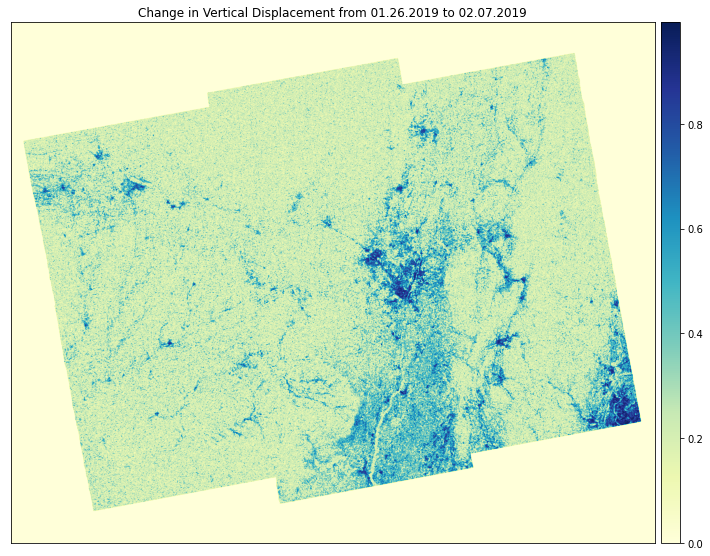

In [ ]:
#Figure 1: vertical displacement maps - finished in QGis and Adobe Illustrator

# open and plot vertical displacement map
with rio.open('S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C_vert_disp.tif') as src:
    feb072019 = src.read(1)
    extent = rio.plot.plotting_extent(src)
    vd_profile = src.profile

ep.plot_bands(feb072019,
              title="Change in Vertical Displacement from 01.26.2019 to 02.07.2019",
              extent=extent,
              cmap="YlGnBu")

plt.show()

In [17]:
hydro = gpd.read_file('areahydroWGS.shp')

In [18]:
print('hydro crs: ', hydro.crs)
print('lidar crs: ', vd_profile['crs'])

hydro crs:  epsg:32618
lidar crs:  EPSG:32618


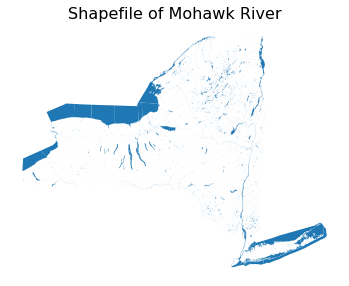

In [21]:
# plot the data
fig, ax = plt.subplots(figsize = (6, 6))
hydro.plot(ax=ax)
ax.set_title("Shapefile of Mohawk River", 
             color='black',
             fontsize = 16)
ax.set_axis_off();

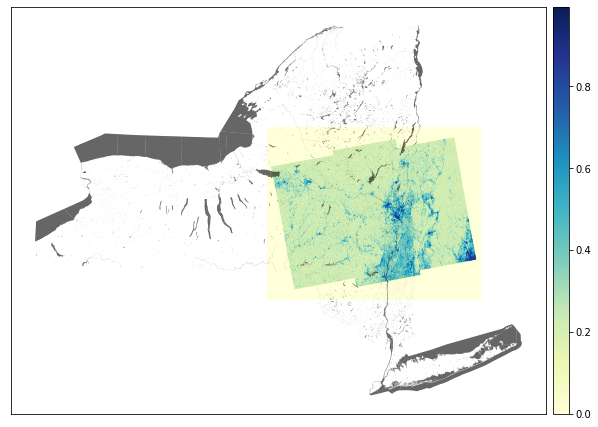

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
ep.plot_bands(feb072019,
              cmap='YlGnBu',
              extent=extent,
              ax=ax)
hydro.plot(ax=ax, alpha=.6, color='black');

In [33]:
import earthpy.spatial as es

In [29]:
cropext = gpd.read_file('realframe.shp')

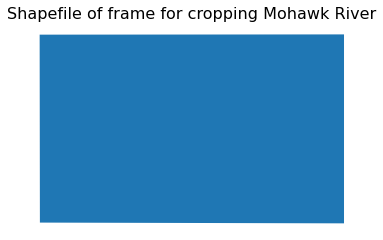

In [31]:
# plot the data
fig, ax = plt.subplots(figsize = (6, 6))
cropext.plot(ax=ax)
ax.set_title("Shapefile of frame for cropping Mohawk River", 
             color='black',
             fontsize = 16)
ax.set_axis_off();

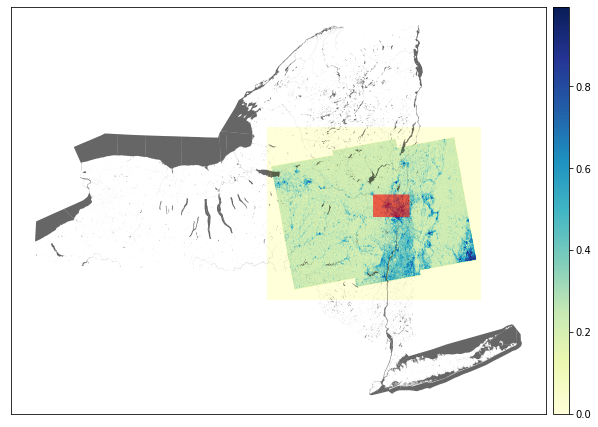

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
ep.plot_bands(feb072019,
              cmap='YlGnBu',
              extent=extent,
              ax=ax)
hydro.plot(ax=ax, alpha=.6, color='black');
cropext.plot(ax=ax, alpha=.6, color='red')

In [34]:
with rio.open('S1AA_20190126T225127_20190207T225126_VVP012_INT80_G_ueF_393C_vert_disp.tif') as src:
    vertdisp1_crop, vertdisp1_meta = es.crop_image(src, cropext)

In [35]:
vertdisp1_meta.update({"driver": "GTiff",
                 "height": vertdisp1_crop.shape[0],
                 "width": vertdisp1_crop.shape[1],
                 "transform": vertdisp1_meta["transform"]})

# generate an extent for the newly cropped object for plotting
cr_ext = rio.transform.array_bounds(vertdisp1_meta['height'], 
                                            vertdisp1_meta['width'], 
                                            vertdisp1_meta['transform'])

bound_order = [0,2,1,3]
cr_extent = [cr_ext[b] for b in bound_order]
cr_extent, cropext.total_bounds

([567960.0, 598920.0, 4754760.0, 4754840.0],
 array([ 567968.51586952, 4723902.99950589,  617743.59698886,
        4754803.63711353]))

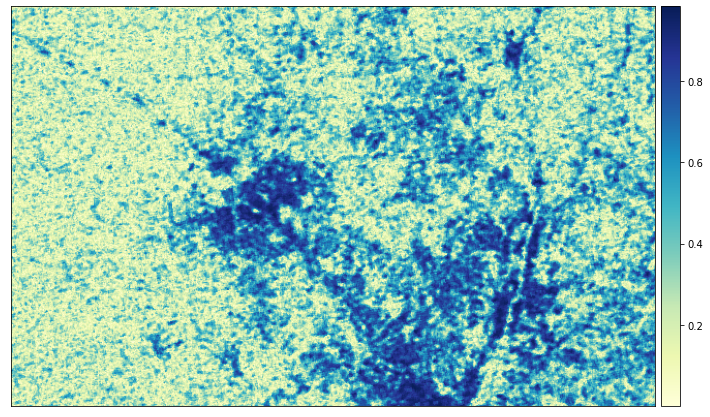

<Figure size 432x288 with 0 Axes>

In [41]:
ep.plot_bands(vertdisp1_crop, cmap='YlGnBu',);
streamgage_pts.plot(ax=ax, alpha=.8, color='pink')

In [ ]:
path_out = "data/spatial-vector-lidar/outputs/soap_lidar_chm_crop.tif"
with rio.open(path_out, 'w', **vertdisp1_meta) as ff:
    ff.write(vertdisp1_crop[0], 1)

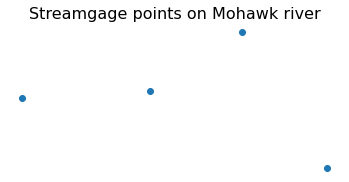

In [42]:
# plot the data
fig, ax = plt.subplots(figsize = (6, 6))
streamgage_pts.plot(ax=ax)
ax.set_title("Streamgage points on Mohawk river", 
             color='black',
             fontsize = 16)
ax.set_axis_off();

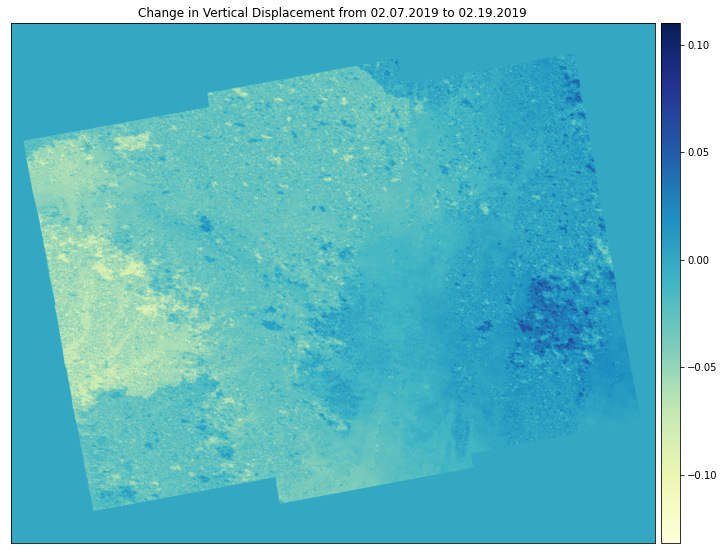

In [43]:
# open and plot vertical displacement map
with rio.open('S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F_vert_disp.tif') as src:
    feb192019 = src.read(1)
    extent = rio.plot.plotting_extent(src)
    vd_profile = src.profile

ep.plot_bands(feb192019,
              title="Change in Vertical Displacement from 02.07.2019 to 02.19.2019",
              extent=extent,
              cmap="YlGnBu")

plt.show()

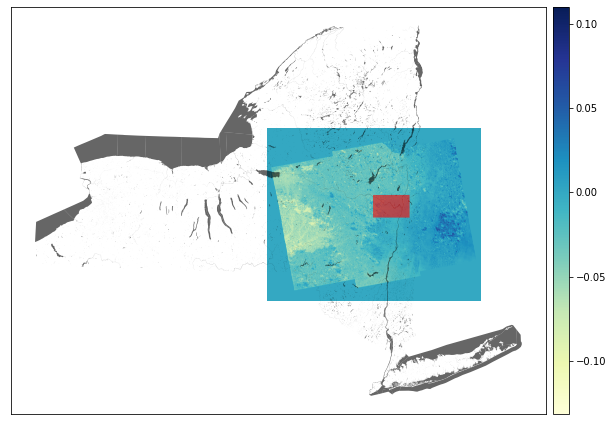

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))
ep.plot_bands(feb192019,
              cmap='YlGnBu',
              extent=extent,
              ax=ax)
hydro.plot(ax=ax, alpha=.6, color='black');
cropext.plot(ax=ax, alpha=.6, color='red')

In [45]:
with rio.open('S1AA_20190207T225126_20190219T225126_VVP012_INT80_G_ueF_EE4F_vert_disp.tif') as src:
    vertdisp2_crop, vertdisp2_meta = es.crop_image(src, cropext)

In [46]:
vertdisp2_meta.update({"driver": "GTiff",
                 "height": vertdisp2_crop.shape[0],
                 "width": vertdisp2_crop.shape[1],
                 "transform": vertdisp2_meta["transform"]})

# generate an extent for the newly cropped object for plotting
cr_ext2 = rio.transform.array_bounds(vertdisp2_meta['height'], 
                                            vertdisp2_meta['width'], 
                                            vertdisp2_meta['transform'])

bound_order = [0,2,1,3]
cr_extent2 = [cr_ext[b] for b in bound_order]
cr_extent2, cropext.total_bounds

([567960.0, 598920.0, 4754760.0, 4754840.0],
 array([ 567968.51586952, 4723902.99950589,  617743.59698886,
        4754803.63711353]))

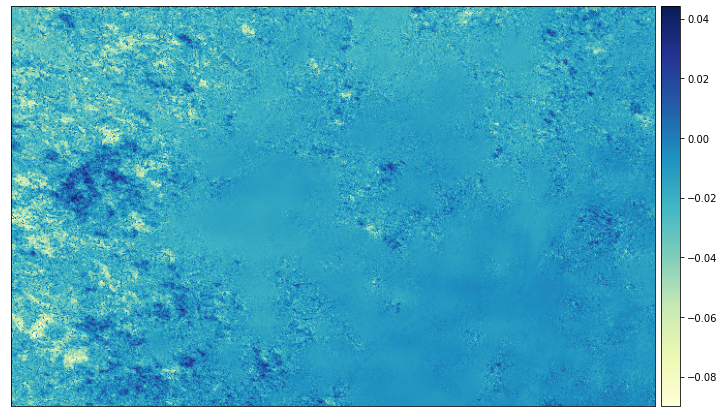

<Figure size 432x288 with 0 Axes>

In [51]:
ep.plot_bands(vertdisp2_crop, cmap='YlGnBu',);
streamgage_pts.plot(ax=ax, alpha=.8, marker='.', markersize=100, color='pink')

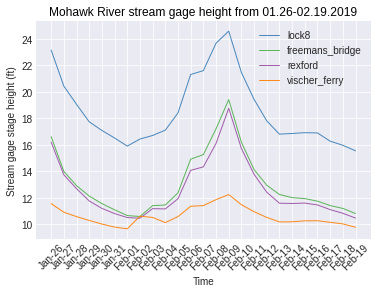

In [60]:
#Figure 2 : time series of stream gages

# Pull in data frame
date = ["Jan-26", "Jan-27", "Jan-28", "Jan-29", "Jan-30", "Jan-31", "Feb-01", "Feb-02", "Feb-03", "Feb-04", "Feb-05", "Feb-06", "Feb-07", "Feb-08", "Feb-09", "Feb-10", "Feb-11", "Feb-12", "Feb-13", "Feb-14", "Feb-15", "Feb-16", "Feb-17", "Feb-18", "Feb-19"]
lock8 = [23.13, 20.41, 19.04, 17.72, 17.07, 16.50, 15.89, 16.42, 16.69, 17.09, 18.39, 21.29, 21.58, 23.65, 24.56, 21.44, 19.41, 17.79, 16.79, 16.84, 16.90, 16.88, 16.26, 15.95, 15.53]
freemans = [16.5993403, 13.9783681, 12.9084722, 12.1203472, 11.5525, 11.0840625, 10.648438, 10.578993, 11.398333, 11.446632, 12.361597, 14.902951, 15.245719, 17.193229, 19.39809, 16.177396, 14.119618, 12.935729, 12.239583, 12.002951, 11.927813, 11.736076, 11.401285, 11.18816, 10.802917]
rexford = [16.19, 13.72, 12.68, 11.75, 11.19, 10.80, 10.50, 10.45, 11.17, 11.15, 11.92, 14.06, 14.32, 16.09, 18.74, 15.71, 13.76, 12.41, 11.58, 11.56, 11.59, 11.45, 11.10, 10.82, 10.46]
vischerferry = [11.55, 10.90, 10.57, 10.28, 10.01, 9.78, 9.65, 10.60, 10.51, 10.12, 10.57, 11.35, 11.40, 11.85, 12.23, 11.47, 10.94, 10.51, 10.17, 10.18, 10.25, 10.26, 10.14, 10.02, 9.77]
gages_df=pd.DataFrame({'date': date, 'lock8': lock8, 'freemans_bridge': freemans, 'rexford': rexford, 'vischer_ferry': vischerferry})
 
# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = plt.get_cmap('Set1')
 
# Plot multiple lines
num=0
for column in gages_df.drop('date', axis=1):
    num+=1
    plt.plot(gages_df['date'], gages_df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc=0, ncol=1)
 
# Add titles
plt.title("Mohawk River stream gage height from 01.26-02.19.2019", loc='center', fontsize=12, fontweight=0, color='black')
plt.xlabel("Time")
plt.xticks(rotation =45)
plt.ylabel("Stream gage stage height (ft)")

# Show the graph
plt.show()

In [ ]:
#Fig 3: linear regression - in 'iceJamStats' colab sheet

In [ ]:
#Fig 4: residual plots - in 'iceJamStats' colab sheet